# Ecommerce Prediction
### Using an artifically created data

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
%matplotlib inline

In [3]:
# Reading the data from the csv file
cust = pd.read_csv('Ecommerce Customers.csv')

In [4]:
# Checking the first 5 records
cust.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
# Checking the statistical summary
cust.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
# Getting more info on the data
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### EDA

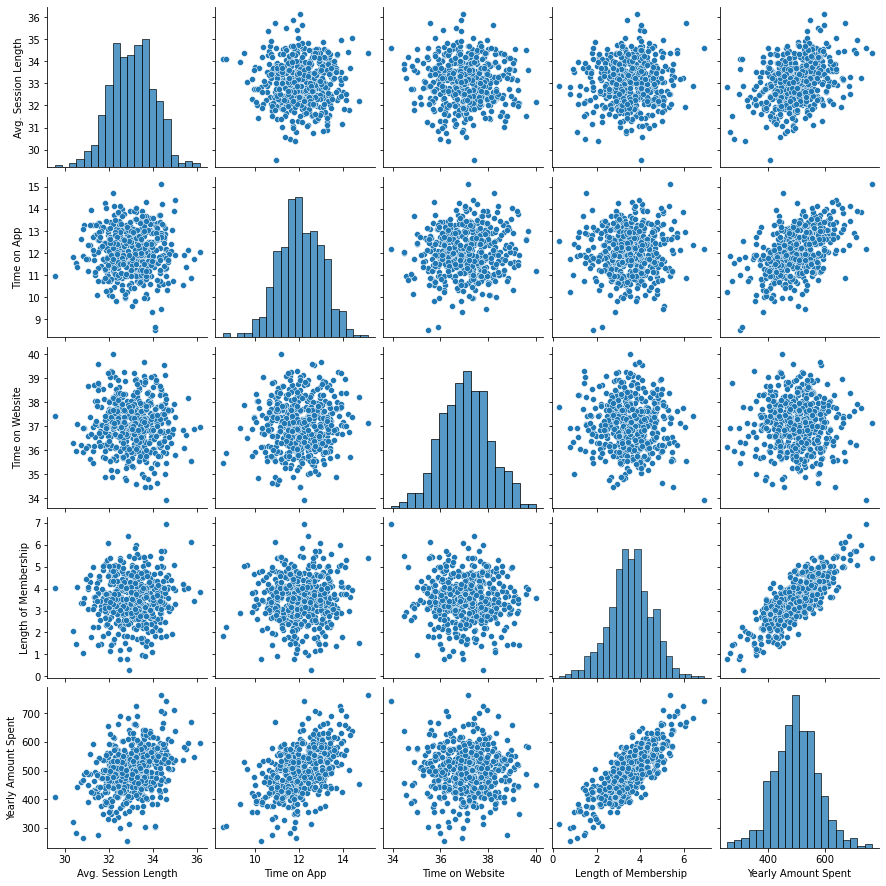

In [7]:
# relationship between the entire data
sns.pairplot(cust)

In [8]:
# Getting Actual column names
cust.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
#checking different type of avatars
cust['Avatar'].value_counts().head(20)

SlateBlue        7
Teal             7
Cyan             7
CadetBlue        7
GreenYellow      7
DarkViolet       6
Wheat            6
Aqua             6
DarkSeaGreen     6
DarkGoldenRod    6
Turquoise        6
PeachPuff        6
Orange           6
DeepPink         6
Purple           6
Bisque           6
SaddleBrown      6
Moccasin         6
Tomato           6
LightSkyBlue     6
Name: Avatar, dtype: int64

In [10]:
# Checking Membership length
cust['Length of Membership'].value_counts().head(15)

4.205904    1
2.267251    1
3.678589    1
4.019051    1
3.803365    1
3.914385    1
4.256983    1
1.481617    1
3.316465    1
3.826031    1
3.392050    1
2.313350    1
3.164944    1
2.245148    1
3.491093    1
Name: Length of Membership, dtype: int64

In [11]:
# Checking for duplicates
cust.duplicated().sum()

0

In [12]:
# Checking for missing values
cust.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<Figure size 504x360 with 0 Axes>

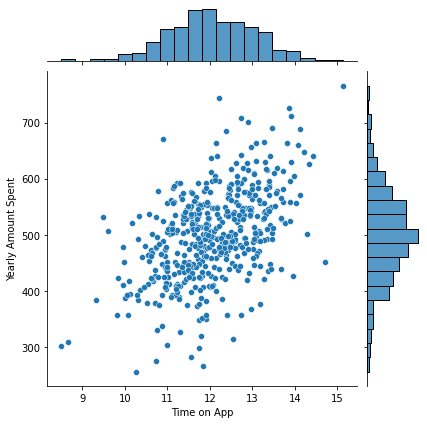

In [13]:
# Comparison between the time on the app and the yearly amount spent
plt.figure(figsize=(7,5))
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=cust)

<Figure size 504x360 with 0 Axes>

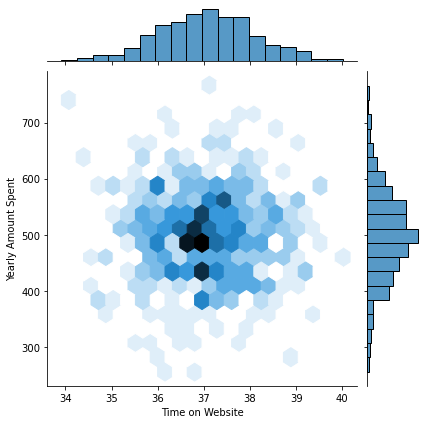

In [14]:
# Comparison between the time on the Website and the yearly amount spent
plt.figure(figsize=(7,5))
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=cust, kind='hex')

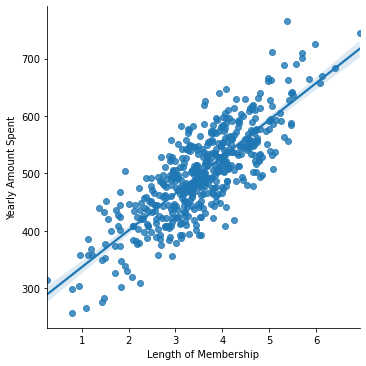

In [15]:
#The most correlated columns from our pairplot is the yearly amount spend and the length of membership, so lets plot it out
sns.lmplot(data=cust, x='Length of Membership', y='Yearly Amount Spent')

<AxesSubplot:>

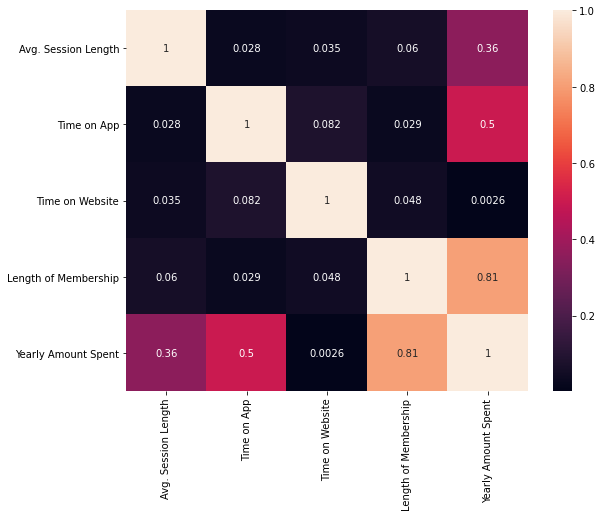

In [16]:
# Creating a heatmap of the corr
plt.figure(figsize=(9,7))
data_corr = abs(cust.corr())
sns.heatmap(data_corr, annot=True)

## Splitting to numerical values and targets
### Using only the numberical values, so will drop some columns

In [17]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [18]:
cust.drop(['Email','Address','Avatar'], axis=1, inplace=True)

In [19]:
cust.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [20]:
Values = cust.drop('Yearly Amount Spent', axis=1)
Target = cust['Yearly Amount Spent']

### Splitting into Test and Train sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(Values, Target, test_size=0.3, random_state=22)

In [22]:
ecom_model = LinearRegression()

In [23]:
ecom_model.fit(X_train, y_train) # fitting the data into the model

LinearRegression()

In [24]:
ecom_model.coef_ # getting coefficient

array([25.3353269 , 38.71859911,  0.59334736, 61.75954322])

In [25]:
coff = pd.DataFrame(ecom_model.coef_, Values.columns, columns=['Coefficents'])
coff

,Coefficents
Avg. Session Length,25.335327
Time on App,38.718599
Time on Website,0.593347
Length of Membership,61.759543


In [26]:
ecom_model.intercept_ # getting the intercept

-1045.2701040697477

In [27]:
predict_ecom = ecom_model.predict(X_test)

Text(0, 0.5, 'Predicted Values')

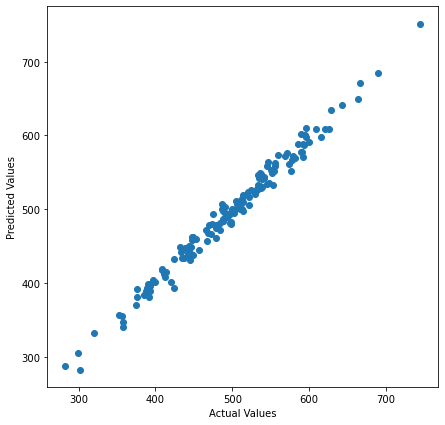

In [28]:
# Plotting for predicted values vs actual values
plt.figure(figsize=(7,7))
plt.scatter(y_test, predict_ecom)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## Evaluation

In [29]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, predict_ecom)

7.902047975028591

In [30]:
# Mean Squared Error
metrics.mean_squared_error(y_test, predict_ecom)

98.24120441454778

In [31]:
# Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, predict_ecom))

9.911670112274106

In [32]:
# Model Score
ecom_model.score(X_test, y_test)

0.9847742778327025

## Saving the Model

In [33]:
from pickle import dump

In [34]:
with open('Ecommerce Predict Saved Model.pkl', 'wb') as model:
    dump(ecom_model, model)